In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<AxesSubplot:>

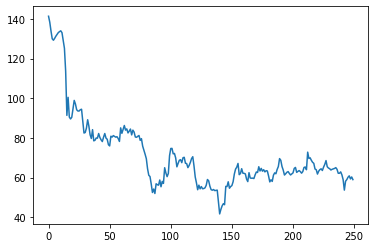

In [36]:
zom = pd.read_csv("ZOMATO.csv")
zom['Close'].plot()

<AxesSubplot:>

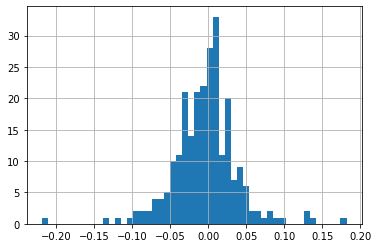

In [37]:
zom['Logreturn'] = np.log(zom['Close']).shift(-1) - np.log(zom['Close'])
zom['Logreturn'].hist(bins=50)

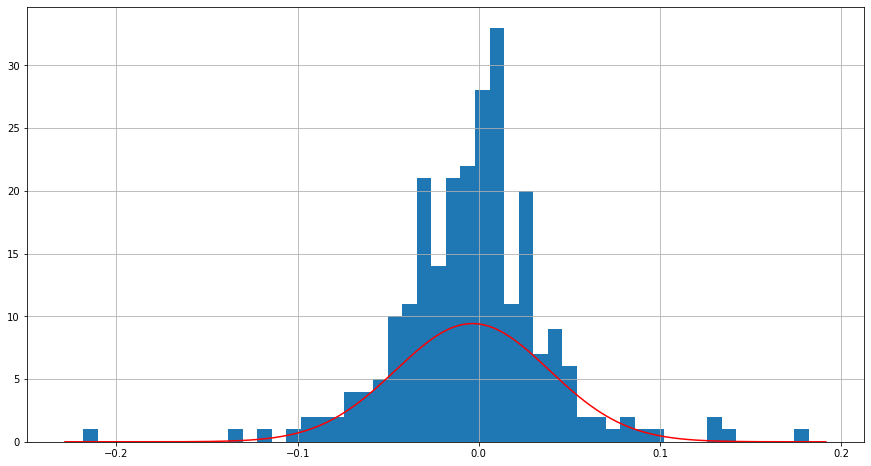

In [39]:
from scipy.stats import norm
mu = zom['Logreturn'].mean()
sigma = zom['Logreturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(zom['Logreturn'].min()-0.01, zom['Logreturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

zom['Logreturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

In [40]:
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk ', VaR)


Single day value at risk  -0.07316525701132187
